# HW02 Overview
`
By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

Please complete all core assignment tasks. For 50% bonus points please complete the optional stretech assignment tasks that will involve more theory and programming.


## Please consult Canvas for the full grading rubric (check Module 02 -> HW 02).

The best approach is to work through this notebook. To cross-check your work, you can verify you have completed the sections marked "TASK:"

Broadly speaking you will be graded on the following:

* Download the data and preprocess the data
* Configure and perform a grid search over the specified range of hyperparameter settings
* Visualize the results of gridsearch and discuss the best model
* Report performance on the held-out test set; present a table of results (for the different models you build)
* For the optional tasks, you will need to review and complete the code provided.


__For your reference, following is the grading rubric from Canvas.__
* The homework is based on a total of 40 points (required tasks only).  
* The last two rows are optional, extra-credit assignments.

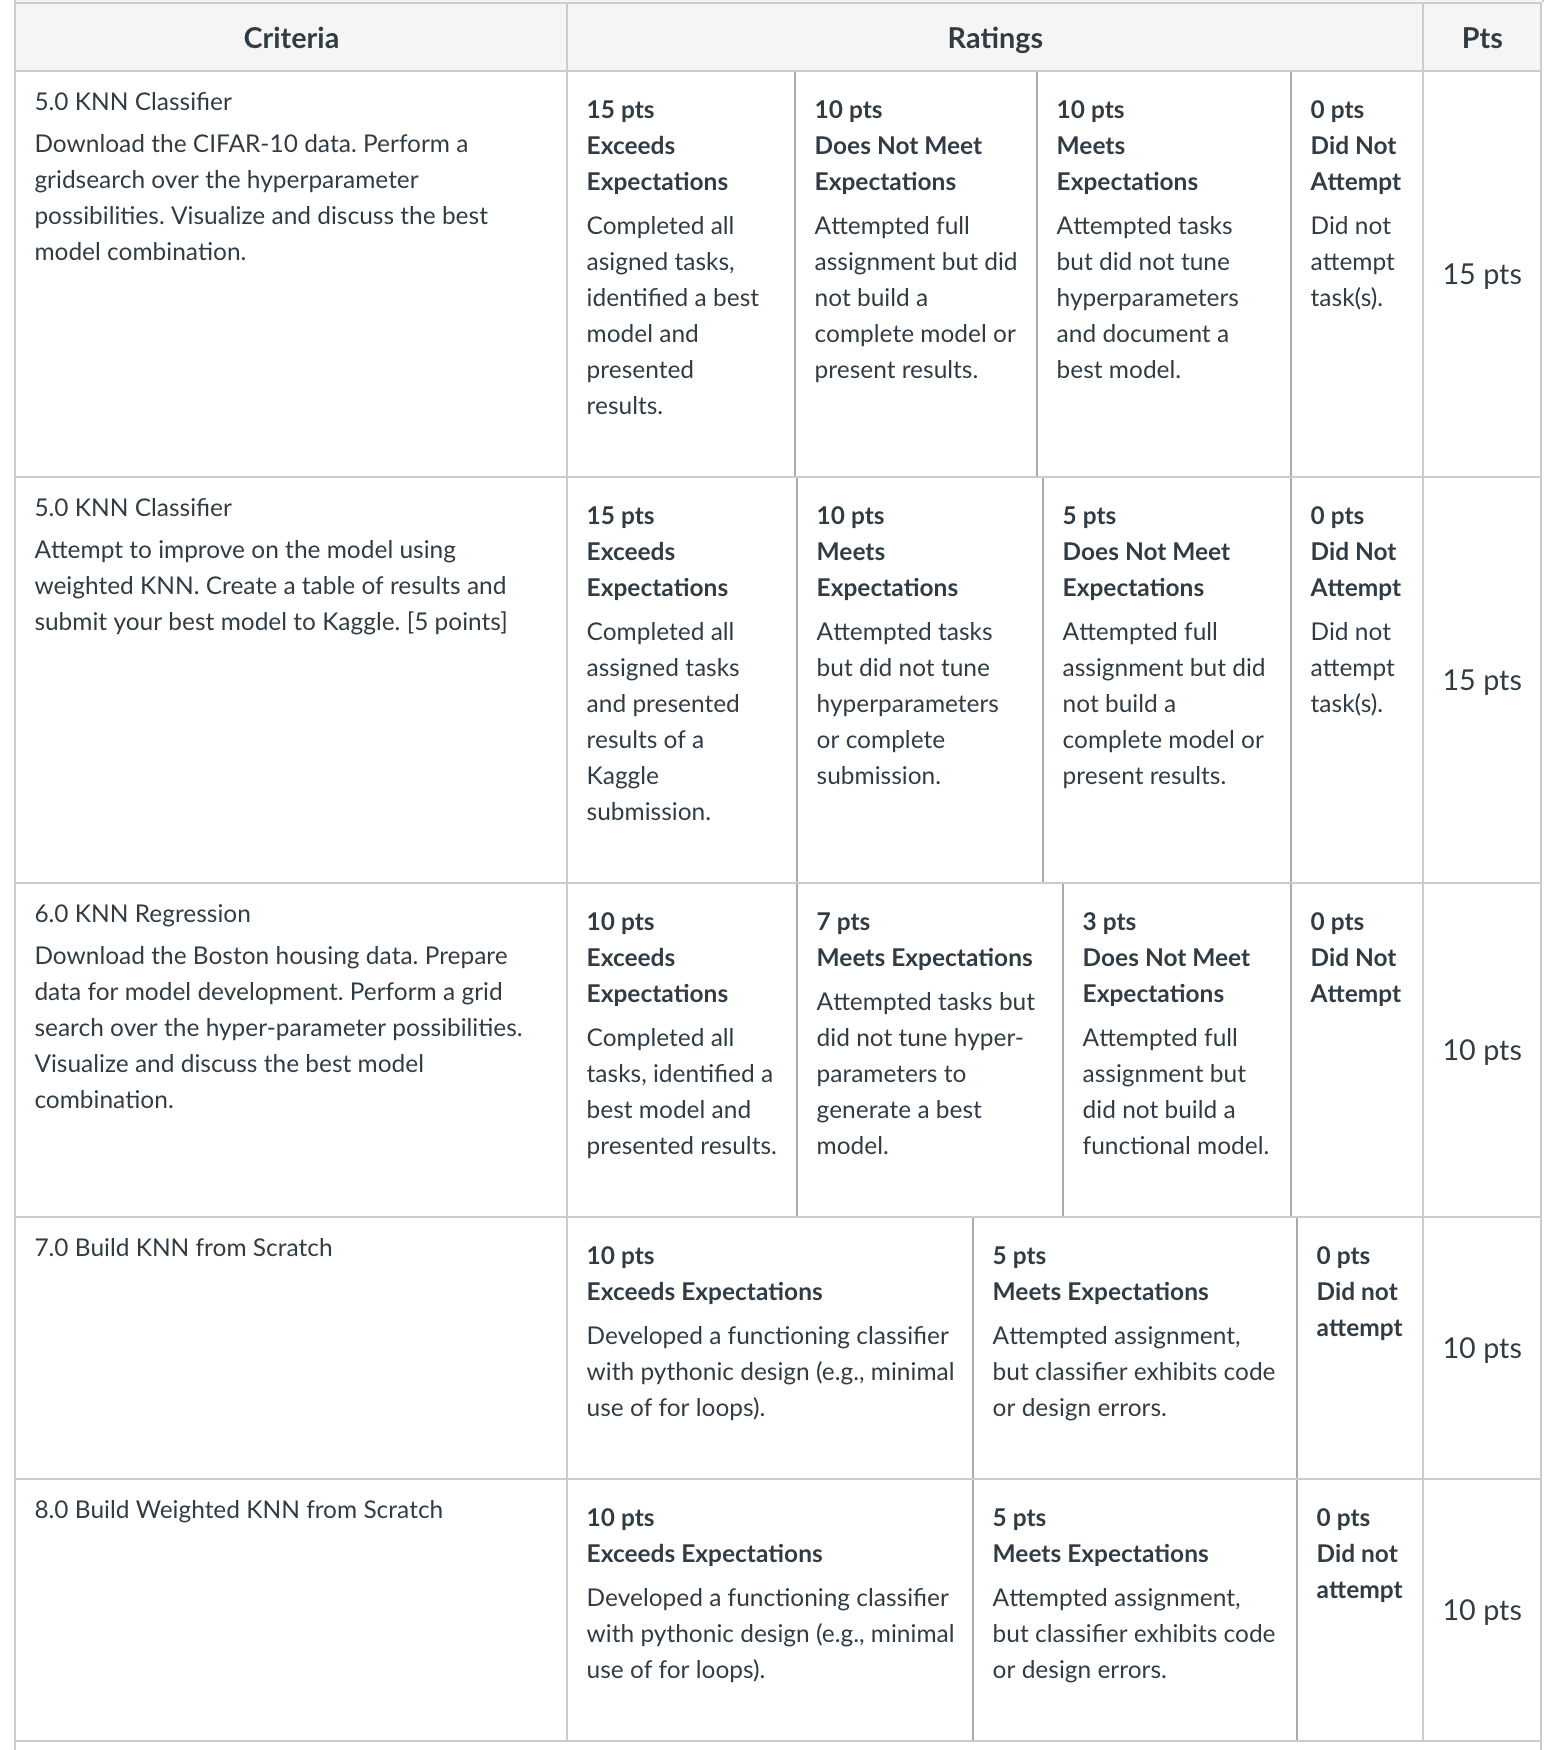

# HW Template solution

Here is a template section that will serve you well when tackling this homework. It is based on the Digits image dataset (10 digits).


## A brief intro to working with image data via the Digits Dataset
The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

For more information click [here Digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

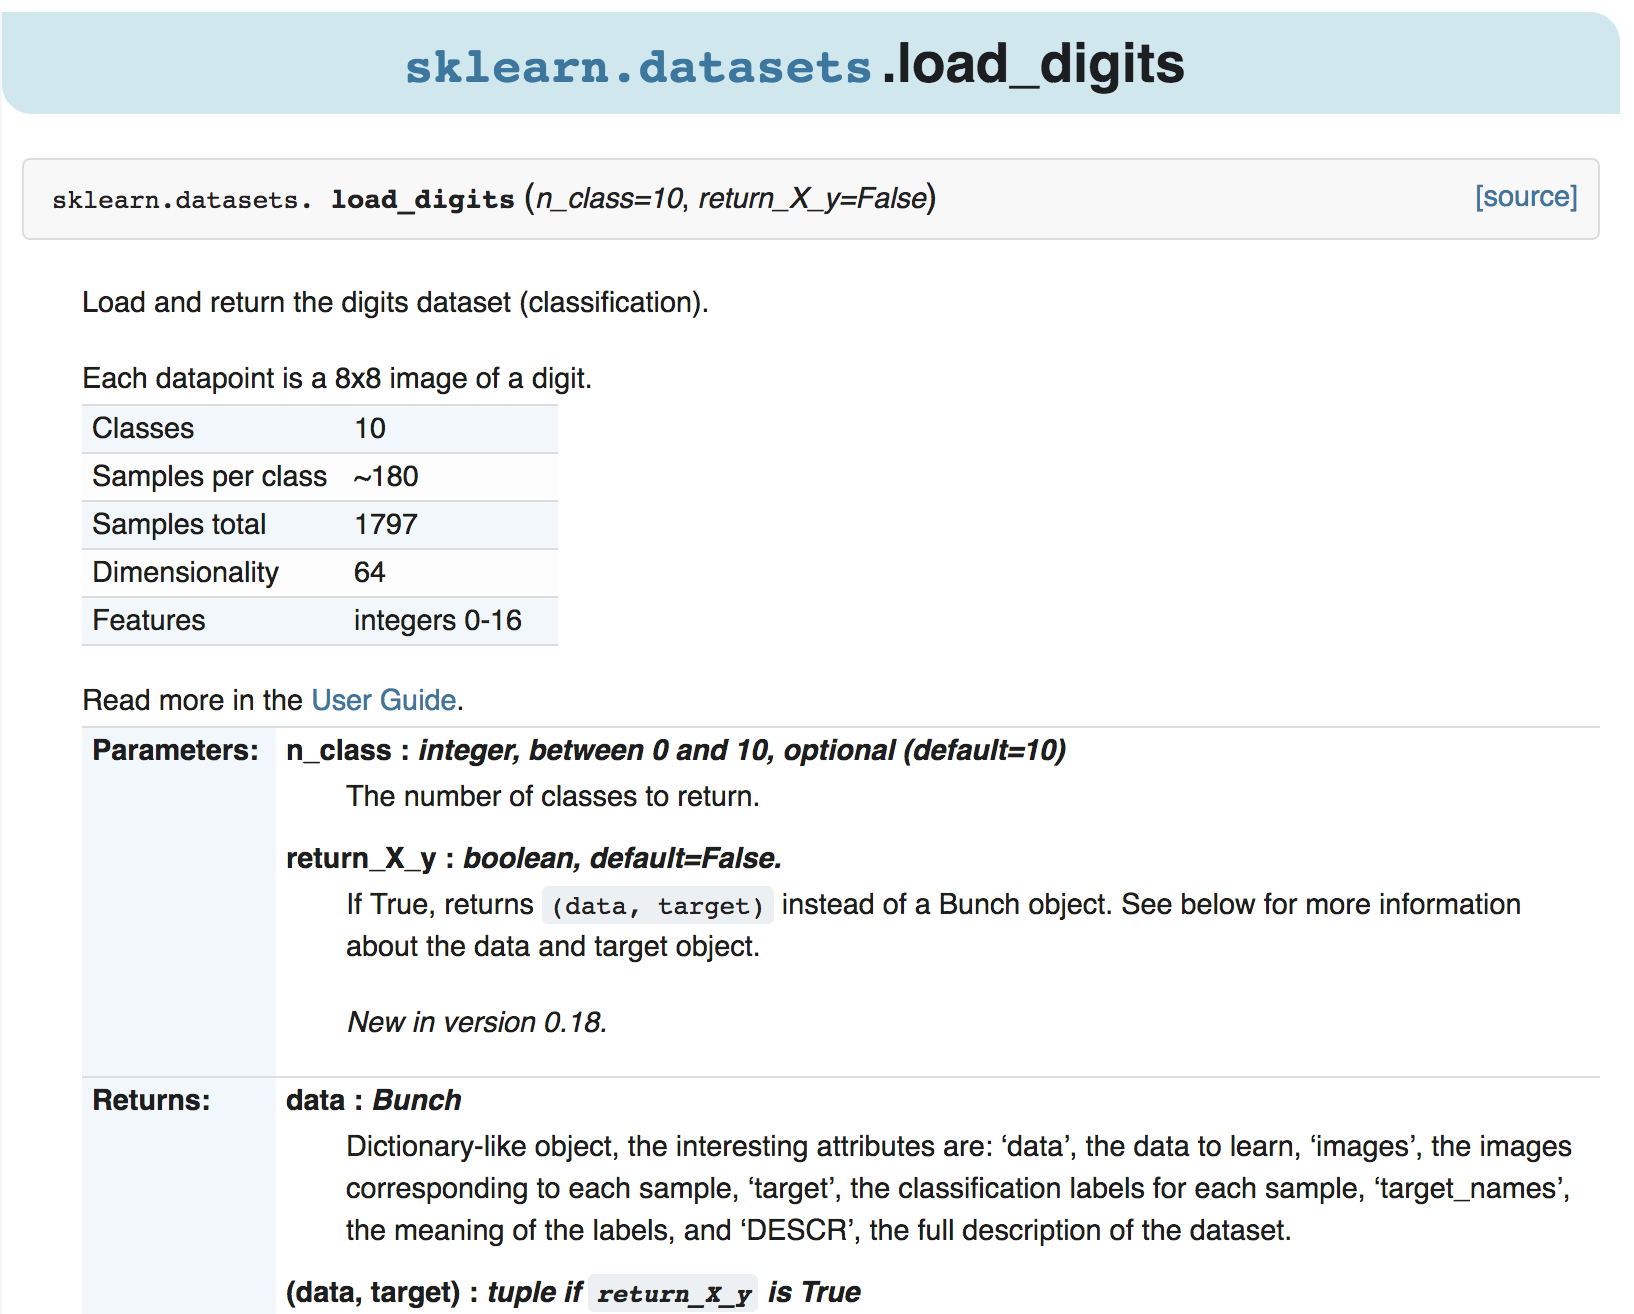

##  Initial setup

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#from __future__ import print_function

## Load the Digits Dataset


In [2]:
from sklearn.datasets import load_digits
# Loading the Digits dataset
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print(f"Image Data Shape {digits.data.shape}")

# Print to show there are 1797 labels (integers from 0-9)
print(f"Label Data Shape {digits.target.shape}")

Image Data Shape (1797, 64)
Label Data Shape (1797,)


## Showing the Images and the Labels (Digits Dataset)


This section is really just to show what the images and labels look like. It usually helps to visualize your data to see what you are working with.

Below, we show the 8x8 image and its corresponding label.

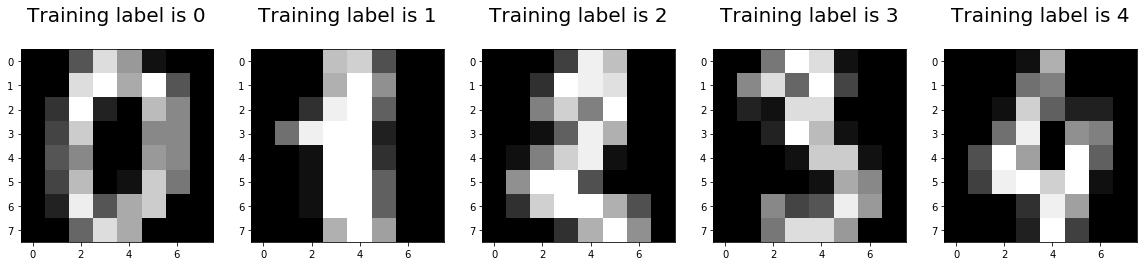

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training label is %i\n' % label, fontsize = 20)

## Splitting Data into Training and Test Sets (Digits Dataset)
We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data (we want to test our trained model objectively).

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import numpy as np
# Loading the Digits dataset
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 1347
Test size: 450


In [5]:
digits.data.shape

(1797, 64)

## Track experiments in a dataframe
For all experiments conducted in the HW please set up a separate log dataframe for each dataset and record major experiment outcomes (e.g., the best model from a gridsearch of hyperparameters)

In [6]:
experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
#expLog.loc[len(expLog)] = ["Knn Dummy", "a desc", 34, 34, "k=4, p=2", 6.4]  
#expLog.loc[len(expLog)] = ["Knn", "a desc", 34, 34, "", 6.4]  

In [7]:
%%time
from __future__ import print_function

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

knn_sk = KNeighborsClassifier(n_jobs=-1)

n_neighbors_range = list(range(1,6))
p_range = list (range(1,4))
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}

np.random.seed(42) # for multiple runs of the same model training, you should re-execute this line
scores = ['accuracy']  # limited to accuracuy for now but could use other metrics such as precision, recall, etc.
start_time = datetime.now()   

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    gridSearch = GridSearchCV(estimator=knn_sk, 
                          param_grid=parameters,  
                          cv=5, 
                          #refit=False,  
                          return_train_score=False,
                          verbose=1,
                          n_jobs=-1  #use multiple CPUs; divide and conquer!
                          )
    gridSearch.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(gridSearch.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print(f'{score}  (+/-stdev*2)     hyper-params')

    means = gridSearch.cv_results_['mean_test_score']  #access elements of the grid search results dictionary
    stds = gridSearch.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gridSearch.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    end_time = datetime.now()
    wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    start_time = datetime.now()   
    y_true, y_pred = y_test, gridSearch.predict(X_test)
    end_time = datetime.now()
    wallTimeInSecondsTest = (end_time - start_time).total_seconds()
    print(classification_report(y_true, y_pred))  # more detailed breakdown of the test perf; optional for now
    print()
    trainAcc = gridSearch.best_score_ #CV accuracy score for best hyperparameter combo
    
    testAcc  = accuracy_score(y_true, y_pred)
    experimentLog.loc[len(experimentLog)] =["knn", "Digits", f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{gridSearch.best_params_}","5-foldCV-based gridSearch BEST model"]
experimentLog

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s


Best parameters set found on development set:

{'n_neighbors': 1, 'p': 2}

Grid scores on development set:

accuracy  (+/-stdev*2)     hyper-params
0.978 (+/-0.005) for {'n_neighbors': 1, 'p': 1}
0.985 (+/-0.015) for {'n_neighbors': 1, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 1, 'p': 3}
0.973 (+/-0.012) for {'n_neighbors': 2, 'p': 1}
0.979 (+/-0.010) for {'n_neighbors': 2, 'p': 2}
0.981 (+/-0.008) for {'n_neighbors': 2, 'p': 3}
0.981 (+/-0.009) for {'n_neighbors': 3, 'p': 1}
0.985 (+/-0.005) for {'n_neighbors': 3, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 3, 'p': 3}
0.978 (+/-0.013) for {'n_neighbors': 4, 'p': 1}
0.984 (+/-0.013) for {'n_neighbors': 4, 'p': 2}
0.984 (+/-0.014) for {'n_neighbors': 4, 'p': 3}
0.982 (+/-0.018) for {'n_neighbors': 5, 'p': 1}
0.985 (+/-0.014) for {'n_neighbors': 5, 'p': 2}
0.984 (+/-0.013) for {'n_neighbors': 5, 'p': 3}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation s

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    6.1s finished


In [8]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,6.34 secs,0.10 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model


In [9]:
print(experimentLog)

  Model Dataset   TrainAcc    TestAcc TrainTime(sec)  TestTime(sec)  \
0   knn  Digits     98.52%     99.11%      6.34 secs      0.10 secs   

                        Param                           Description  
0  {'n_neighbors': 1, 'p': 2}  5-foldCV-based gridSearch BEST model  


In [10]:
best_p = gridSearch.best_params_["p"]
best_n = gridSearch.best_params_["n_neighbors"]
print("best_p: ",best_p)
print("best_n: ",best_n)

best_p:  2
best_n:  1


### best_model.cv_results_ holds a lot of useful information

Please have a closer look at  

* gridSearch.cv_results_["param_n_neighbors"]                
* gridSearch.cv_results_["param_p"]
* gridSearch.cv_results_["mean_test_score"] 


In [11]:
# have a look at CV dictionary of results
gridSearch.cv_results_

{'mean_fit_time': array([ 0.0115808 ,  0.00281162,  0.00277743,  0.00193582,  0.00209746,
         0.00232358,  0.00185094,  0.00212522,  0.0024333 ,  0.00201936,
         0.00203505,  0.00227342,  0.00202198,  0.00214868,  0.00221863]),
 'mean_score_time': array([ 0.13796668,  0.10806289,  0.58164978,  0.1505724 ,  0.11076813,
         0.62478461,  0.13641734,  0.10888996,  0.67396183,  0.13318229,
         0.11677775,  0.79128742,  0.14194469,  0.1141933 ,  0.71823602]),
 'mean_test_score': array([ 0.97772829,  0.98515219,  0.98515219,  0.97327394,  0.97921307,
         0.98069785,  0.98069785,  0.98515219,  0.98515219,  0.97847068,
         0.98366741,  0.9844098 ,  0.98218263,  0.98515219,  0.9844098 ]),
 'param_n_neighbors': masked_array(data = [1 1 1 2 2 2 3 3 3 4 4 4 5 5 5],
              mask = [False False False False False False False False False False False False
  False False False],
        fill_value = ?),
 'param_p': masked_array(data = [1 2 3 1 2 3 1 2 3 1 2 3 1 2 3],
 

## Analysis: report any interesting aspect of best_model
Please report and discuss any interesting aspect of best_model dictionary (there is no wrong or right response here!)

This a sample analysis of our grid search of hyperparameters. Please adapt this cell for your own experimental analysis and conclusions.

We explored a grid of 3x5 (15 experiments), `gridSearch.cv_results_['params']`:: 

`
accuracy  (+/-stdev*2)     hyper-params
0.978 (+/-0.005) for {'n_neighbors': 1, 'p': 1}
0.985 (+/-0.015) for {'n_neighbors': 1, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 1, 'p': 3}
0.973 (+/-0.012) for {'n_neighbors': 2, 'p': 1}
0.979 (+/-0.010) for {'n_neighbors': 2, 'p': 2}
0.981 (+/-0.008) for {'n_neighbors': 2, 'p': 3}
0.981 (+/-0.009) for {'n_neighbors': 3, 'p': 1}
0.985 (+/-0.005) for {'n_neighbors': 3, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 3, 'p': 3}
0.978 (+/-0.013) for {'n_neighbors': 4, 'p': 1}
0.984 (+/-0.013) for {'n_neighbors': 4, 'p': 2}
0.984 (+/-0.014) for {'n_neighbors': 4, 'p': 3}
0.982 (+/-0.018) for {'n_neighbors': 5, 'p': 1}
0.985 (+/-0.014) for {'n_neighbors': 5, 'p': 2}
0.984 (+/-0.013) for {'n_neighbors': 5, 'p': 3}
`
 
 Each of these experiments led to the follow mean accuracy scores (over 5 fold CV) using: 
 
 `>>>gridSearch.cv_results_['mean_test_score']`:
  
  `
  'mean_test_score': array([
  0.29  , 0.2778, 0.2486, 0.2602, 0.2438, 
  0.2216, 0.2836, 0.2662, 0.244 , 0.296 , 
  0.2746, 0.2498, 0.306 , 0.2724, 0.2514]),
  `
  
  The CV accuracy score for best hyperparameter combo can be extracted from the GridSearch as follows:
  
 `>>> gridSearch.best_score_ #CV accuracy score for best hyperparameter combo`
`98.52%`

  Based on these accuracy scores the best hyperparamters are ` 'n_neighbors': 1, 'p': 2` with an accuracy of **0.985** (`98.52%` accuracy). This accuracy is very simialar to than other hyperparamter combinations (this is a small dataset that exhibits a perforance plateau. However, one could dispute that 98.52 is not that different to 98.5. In practice, we might choose the simpler model (so happens to be 1-neighbors solution here) as it is cheaper to compute even it was not the best performer.   Later in this course we will study how to make a more principled decision based on statistical significance tests. 
  

## Visualize the performance metrics along each hyperparameter


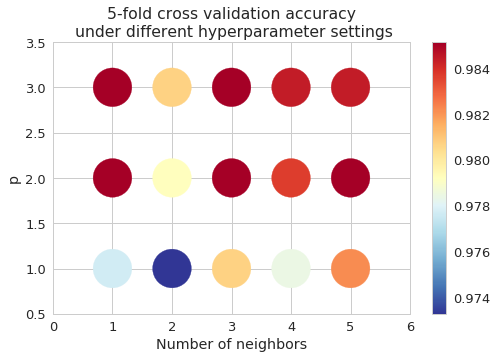

In [12]:
plt.figure(figsize=(8, 5))
sc = plt.scatter(gridSearch.cv_results_["param_n_neighbors"], 
                 gridSearch.cv_results_["param_p"], 
                 c=gridSearch.cv_results_["mean_test_score"], 
                 cmap = plt.get_cmap("RdYlBu_r"), 
                 s=1500)
plt.colorbar(sc)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.xlabel("Number of neighbors")
plt.ylabel("p")
plt.title("5-fold cross validation accuracy\n under different hyperparameter settings")
plt.xlim([0, 6])
plt.ylim([0.5, 3.5]);

Let's choose the best $p^*$ and see how accuracy depends on the number of nearest neightbors for a KNN classifier  $p$

In [13]:
p_idx = gridSearch.cv_results_["param_p"].data == best_p

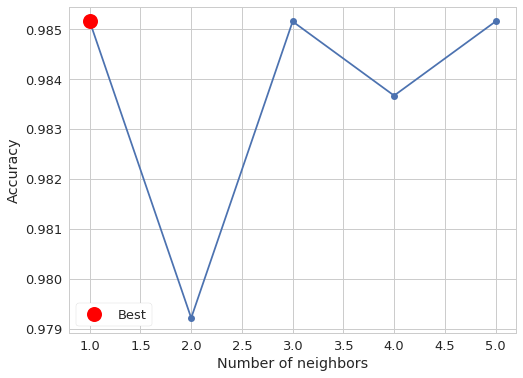

In [14]:
plt.figure(figsize=(8,6))
plt.plot(gridSearch.cv_results_["param_n_neighbors"].data[p_idx], 
         gridSearch.cv_results_["mean_test_score"][p_idx], 
         "o-")
plt.plot([best_n], [gridSearch.cv_results_["mean_test_score"][p_idx][best_n - 1]], "or", markersize=15, label="Best")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("")
plt.grid(True)
plt.legend(numpoints=1)
plt.show()

Let's have another look at  table of results (best model from the gridsearch).

In [15]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,6.34 secs,0.10 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model


# Image classification dataset: CIFAR10

In this homework, we will be using a couple of datasets. The bigger one is this Image classification dataset: CIFAR10.

** Please DOWNLOAD image DATA FROM [HERE](http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) AND PUT IT TO THE DATA FOLDER** 

The [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. Such a situation is called **multiclass** classification in oppose to **multilabel** classification when each example may have multiple label.

One can see state-of-the-art results [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

In [31]:
!apt update
!apt install -y wget

Ign:1 http://deb.debian.org/debian stretch InRelease
Get:2 http://security.debian.org stretch/updates InRelease [94.3 kB]
Get:3 http://deb.debian.org/debian stretch-updates InRelease [91.0 kB]
Get:4 http://deb.debian.org/debian stretch Release [118 kB]    
Get:5 http://deb.debian.org/debian stretch Release.gpg [2434 B]
Get:6 http://security.debian.org stretch/updates/main amd64 Packages [584 kB]m
Get:7 http://deb.debian.org/debian stretch-updates/main amd64 Packages [5479 B]
Get:8 http://deb.debian.org/debian stretch/main amd64 Packages [9488 kB]
Fetched 10.4 MB in 1s (5637 kB/s)   33m
Reading package lists... Done
Building dependency tree       
Reading state information... Done
32 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  ca-certificates libffi6 libgmp10 libgnutls30 libhogweed4 libidn11 libidn2-0
  libnettle6 l

In [32]:
!mkdir ~/tmp  #store data in dir outside your gitRepo

mkdir: cannot create directory '/root/tmp': File exists


In [33]:
!ls /root/tmp/

In [34]:
!wget -O ~/tmp/cifar-10-python.tar.gz http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

wget: /usr/local/lib/libuuid.so.1: no version information available (required by wget)
--2019-01-17 06:31:52--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: '/root/tmp/cifar-10-python.tar.gz'

/root/tmp/cifar-10- 100%[===================>] 162.60M  5.56MB/s    in 54s     

2019-01-17 06:32:45 (3.03 MB/s) - '/root/tmp/cifar-10-python.tar.gz' saved [170498071/170498071]



In [35]:
!tar -C ~/tmp -xvzf ~/tmp/cifar-10-python.tar.gz 
#%cd ..
!ls ~/tmp

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
cifar-10-batches-py  cifar-10-python.tar.gz


## Upacking the Data and doing EDA
In this section we unpack the CIFAR-10 Data set and do some exploratory data analysis

In [16]:
import _pickle as cPickle
import tarfile

import numpy as np
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Set style for plotting

In [17]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Fix random seed for reproducibility

In [18]:
np.random.seed(42)

Unarchive data

### Reading

Data are stored as a memory dump with python $\text{dict}$ object. It was created using **pickle** function. To read one should "unpickle" it.

In [19]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding='latin1')
    fo.close()
    return dict

Data are also splitted in to 5 pieces for conveniece. Let's read them all and concatenate

In [20]:
!ls /root/tmp/cifar-10-batches-py

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


In [21]:
for b in range(1, 6):
    data_batch = unpickle("/root/tmp/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)

Read test data. In this dataset train/test split is provided by authors of the dataset to be able to consistently evaluate solutions

In [22]:
data_batch = unpickle("/root/tmp/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

Read meta-information file with the names of the classes

In [23]:
classes = unpickle("/root/tmp/cifar-10-batches-py/batches.meta")["label_names"]

### Pre-processing

This is a big dataset!

In [24]:
print(f"Train size:, {X_train.shape[0]}, {X_train.shape[1]}")
print(f"Train size:, {X_test.shape[0]}, {X_test.shape[1]}")

Train size:, 50000, 3072
Train size:, 10000, 3072


### Downsample the data so we can experiment more easily
Save the full dataset so we can train on the full training set later and do a blind test on the full test set.


In [25]:
X_train_full = X_train
y_train_full = y_train
X_test_full = X_test
y_test_full = y_test

Let's downsample (common strategy to get a POC, proof of concept working) the data by taking a random sample of 2% the training and test sets. This will  allow us to do some experiments much more quickly. **PLEASE do NOT FORGET to use all the data for Kaggle submissions**.

In [26]:
subsample_rate = 0.02

We want to preserve the same quantity ratio between classes. In python such an option is called **stratification**. Let's randomly (with fixed initial seed for the sake of reproducibility) divide part of train data

In [27]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


The same for test

In [28]:
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Track experiements in a dataframe
For all experiments conducted in the HW please set up a separate log dataframe for each dataset and record major experiment outcomes (e.g., the best model from a gridsearch of hyperparameters)

In [29]:
# We have already initialized this above so no need to run this cell
#experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
#expLog.loc[len(expLog)] = ["Knn Dummy", "a desc", 34, 34, "k=4, p=2", 6.4]  
#expLog.loc[len(expLog)] = ["Knn", "a desc", 34, 34, "", 6.4]  

In [30]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,6.34 secs,0.10 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model


# Assignment  starts here


In order to complete this lab successfully, please review the following lab:
* `CrossvalidationAndGridSearch-Tutorial.ipynb` from Unit 02 Labs folder (Section 5 in the Lab Notebook).
* Also see section 2 above as a template solution for this Homework

## K Nearest Neighbors: Grid Search
Using the CIFAR-10 dataset, use the built-in Sklearn implementation of KNN classifier and find out the best set of parameters from the following range:

$$
\text{n_neighbors} \in \{1 \ldots 5\}\\
\text{p} \in \{1 \ldots 3\}
$$

where $\text{n_neighbors}$ is the number of neighbors to consider and $\text{p}$ is the order of $L_p$ metric (see explanation below)


### Sklearn  GridSearch with Cross Validation
Complete the code in this section to do the above hyperparameter tuning via SKLearn's `GridSearchCV` over the training set only. The test dataset should only be used to report your findings after you have committed to your best model(s).

Please use SKlearn KNN.

In [31]:
knn_sk = KNeighborsClassifier(n_jobs=-1)

And specify the dictionary of parameters we want to optimize along with their ranges

$\text{GridSearchCV}$ is a workhorse!  There are three main arguments:
* $\text{estimator} = \text{knn_sk} -$classifier to use; KNN from sklearn defined before
* $\text{param_grid} = \text{parameters} -$parameters ranges to test
* $\text{cv} = \text{split} -$splitting iterator to use

In [32]:
# comfirm we are using a subsample of the data
X_train.shape # 1000 training examples

(1000, 3072)

In [33]:
%%time
from __future__ import print_function

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

knn_sk = KNeighborsClassifier(n_jobs=-1)

# Set the parameters by cross-validation
#==================================================#
#               Place your code between here       #
n_neighbors_range = list(range(1,6))
p_range = list (range(1,4))
#               ... and here                       #
# When asked to copy/paste your code in homework   # 
# submission quiz, only submit the code you added  #
# (or modified) between the comment blocks         #
# Hint:  you need to set the params used below     #
#==================================================#
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}

np.random.seed(42) # for multiple runs of the same model training, you should re-execute this line
scores = ['accuracy']  # limited to accuracuy for now but could use other metrics such as precision, recall, etc.
start_time = datetime.now()   

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    gridSearch = GridSearchCV(estimator=knn_sk, 
                          param_grid=parameters,  
                          cv=5, 
                          #refit=False,  
                          return_train_score=False,
                          verbose=1,
                          n_jobs=-1  #use multiple CPUs; divide and conquer!
                          )
    gridSearch.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(gridSearch.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print(f'{score}  (+/-stdev*2)     hyper-params')

    means = gridSearch.cv_results_['mean_test_score']  #access elements of the grid search results dictionary
    stds = gridSearch.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gridSearch.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    end_time = datetime.now()
    wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    start_time = datetime.now()   
    y_true, y_pred = y_test, gridSearch.predict(X_test)
    end_time = datetime.now()
    wallTimeInSecondsTest = (end_time - start_time).total_seconds()
    print(classification_report(y_true, y_pred))  # more detailed breakdown of the test perf; optional for now
    print()
    trainAcc = gridSearch.best_score_ #CV accuracy score for best hyperparameter combo
    
    testAcc  = accuracy_score(y_true, y_pred)
    experimentLog.loc[len(experimentLog)] =["knn", "Cifar10", f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{gridSearch.best_params_}","5-foldCV-based gridSearch BEST model"]
#experimentLog = pd.DataFrame(columns=["Model", "TrainAcc", "TestAcc", "TrainTime(sec)", "TestTime(sec)", "Params", "Description",])
experimentLog

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.9min finished


Best parameters set found on development set:

{'n_neighbors': 4, 'p': 1}

Grid scores on development set:

accuracy  (+/-stdev*2)     hyper-params
0.236 (+/-0.039) for {'n_neighbors': 1, 'p': 1}
0.236 (+/-0.019) for {'n_neighbors': 1, 'p': 2}
0.231 (+/-0.023) for {'n_neighbors': 1, 'p': 3}
0.211 (+/-0.027) for {'n_neighbors': 2, 'p': 1}
0.204 (+/-0.042) for {'n_neighbors': 2, 'p': 2}
0.186 (+/-0.038) for {'n_neighbors': 2, 'p': 3}
0.225 (+/-0.030) for {'n_neighbors': 3, 'p': 1}
0.237 (+/-0.042) for {'n_neighbors': 3, 'p': 2}
0.221 (+/-0.028) for {'n_neighbors': 3, 'p': 3}
0.257 (+/-0.043) for {'n_neighbors': 4, 'p': 1}
0.240 (+/-0.020) for {'n_neighbors': 4, 'p': 2}
0.227 (+/-0.045) for {'n_neighbors': 4, 'p': 3}
0.247 (+/-0.034) for {'n_neighbors': 5, 'p': 1}
0.254 (+/-0.026) for {'n_neighbors': 5, 'p': 2}
0.244 (+/-0.039) for {'n_neighbors': 5, 'p': 3}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation s

In [34]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,6.34 secs,0.10 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model
1,knn,Cifar10,25.70%,23.50%,233.01 secs,0.41 secs,"{'n_neighbors': 4, 'p': 1}",5-foldCV-based gridSearch BEST model


In [35]:
best_p = gridSearch.best_params_["p"]
best_n = gridSearch.best_params_["n_neighbors"]
print("best_p: ",best_p)
print("best_n: ",best_n)

best_p:  1
best_n:  4


### best_model.cv_results_ holds a lot of useful information

Please have a closer look at  

* gridSearch.cv_results_["param_n_neighbors"]                
* gridSearch.cv_results_["param_p"]
* gridSearch.cv_results_["mean_test_score"] 


In [36]:
# have a look at CV dictionary of results
gridSearch.cv_results_

{'mean_fit_time': array([ 0.2408823 ,  0.61152854,  0.76028519,  0.26920543,  0.32257099,
         0.35610094,  0.28576646,  0.29143758,  0.32293448,  0.35391068,
         0.36742306,  0.3374476 ,  0.34831276,  0.28290606,  0.33109055]),
 'mean_score_time': array([  1.14077168,   0.76372852,  36.65703979,   0.90397897,
          0.93979664,  35.18816676,   0.93326287,   0.94740181,
         32.79700227,   0.94071169,   0.93556228,  33.07080889,
          0.95190029,   0.92371402,  27.7598485 ]),
 'mean_test_score': array([ 0.236,  0.236,  0.231,  0.211,  0.204,  0.186,  0.225,  0.237,
         0.221,  0.257,  0.24 ,  0.227,  0.247,  0.254,  0.244]),
 'param_n_neighbors': masked_array(data = [1 1 1 2 2 2 3 3 3 4 4 4 5 5 5],
              mask = [False False False False False False False False False False False False
  False False False],
        fill_value = ?),
 'param_p': masked_array(data = [1 2 3 1 2 3 1 2 3 1 2 3 1 2 3],
              mask = [False False False False False False Fal

## Analysis: report any interesting aspect of best_model
Please report and discuss any interesting aspect of best_model dictionary (there is no wrong or right response here!)

In [37]:
gridSearch.best_score_
acc = gridSearch.best_score_
print("KNN Grid Search Sklearn", np.round(acc, 3))

KNN Grid Search Sklearn 0.257


This a sample analysis of our grid search of hyperparameters. Please adapt this cell for your own experimental analysis and conclusions.

We explored a grid of 3x5 (15 experiments), `gridSearch.cv_results_['params']`:: 

`
accuracy  (+/-stdev*2)     hyper-params
0.236 (+/-0.039) for {'n_neighbors': 1, 'p': 1}
0.236 (+/-0.019) for {'n_neighbors': 1, 'p': 2}
0.231 (+/-0.023) for {'n_neighbors': 1, 'p': 3}
0.211 (+/-0.027) for {'n_neighbors': 2, 'p': 1}
0.204 (+/-0.042) for {'n_neighbors': 2, 'p': 2}
0.186 (+/-0.038) for {'n_neighbors': 2, 'p': 3}
0.225 (+/-0.030) for {'n_neighbors': 3, 'p': 1}
0.237 (+/-0.042) for {'n_neighbors': 3, 'p': 2}
0.221 (+/-0.028) for {'n_neighbors': 3, 'p': 3}
0.257 (+/-0.043) for {'n_neighbors': 4, 'p': 1}
0.240 (+/-0.020) for {'n_neighbors': 4, 'p': 2}
0.227 (+/-0.045) for {'n_neighbors': 4, 'p': 3}
0.247 (+/-0.034) for {'n_neighbors': 5, 'p': 1}
0.254 (+/-0.026) for {'n_neighbors': 5, 'p': 2}
0.244 (+/-0.039) for {'n_neighbors': 5, 'p': 3}
`
 
 Each of these experiments led to the follow mean accuracy scores (over 5 fold CV) using: 
 
 `>>>gridSearch.cv_results_['mean_test_score']`:
  
  `
  'mean_test_score': array([0.236, 0.236, 0.231, 0.211, 0.204, 0.186, 0.225, 0.237, 0.221,
        0.257, 0.24 , 0.227, 0.247, 0.254, 0.244])
  `
  
  The CV accuracy score for best hyperparameter combo can be extracted from the GridSearch as follows:
  
 `>>> gridSearch.best_score_ #CV accuracy score for best hyperparameter combo`
`0.257`

  Based on these accuracy scores the best hyperparamters are ` 'n_neighbors': 1, 'p': 2` with an accuracy of **0.257** (`25.7%` accuracy). This accuracy is very simialar to than other hyperparamter combinations (this is a small dataset that exhibits a perforance plateau. However, one could dispute that 0.257 is not that different to 0.254. In practice, we might choose a simpler model (e.g., a 1-neighbors solution ) as it is cheaper to compute even it was not the best performer.   Later in this course we will study how to make a more principled decision based on statistical significance tests. 
  

## Visualize the performance metrics along each hyperparameter


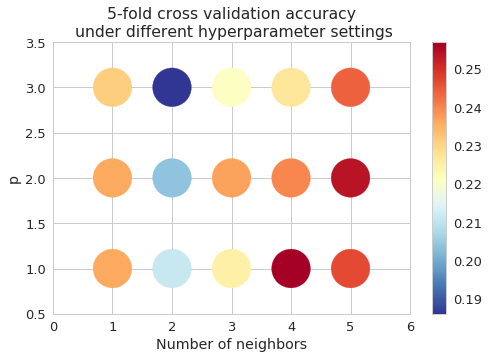

In [38]:
plt.figure(figsize=(8, 5))
sc = plt.scatter(gridSearch.cv_results_["param_n_neighbors"], 
                 gridSearch.cv_results_["param_p"], 
                 c=gridSearch.cv_results_["mean_test_score"], 
                 cmap = plt.get_cmap("RdYlBu_r"), 
                 s=1500)
plt.colorbar(sc)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.xlabel("Number of neighbors")
plt.ylabel("p")
plt.title("5-fold cross validation accuracy\n under different hyperparameter settings")
plt.xlim([0, 6])
plt.ylim([0.5, 3.5]);

Let's choose the best $p^*$ and see how accuracy depends on the number of nearest neightbors for a KNN classifier  $p$

In [39]:
p_idx = gridSearch.cv_results_["param_p"].data == best_p

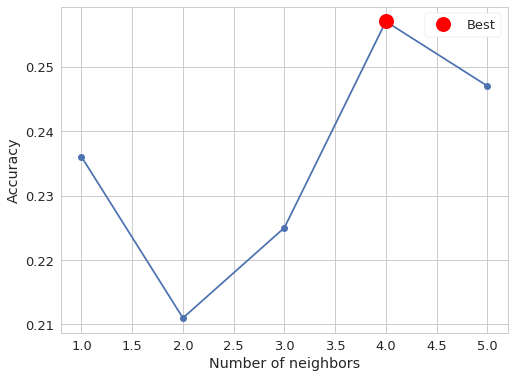

In [40]:
plt.figure(figsize=(8,6))
plt.plot(gridSearch.cv_results_["param_n_neighbors"].data[p_idx], 
         gridSearch.cv_results_["mean_test_score"][p_idx], 
         "o-")
plt.plot([best_n], [gridSearch.cv_results_["mean_test_score"][p_idx][best_n - 1]], "or", markersize=15, label="Best")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("")
plt.grid(True)
plt.legend(numpoints=1)
plt.show()

Let's have another look at  table of results (best model from the gridsearch).

In [41]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,6.34 secs,0.10 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model
1,knn,Cifar10,25.70%,23.50%,233.01 secs,0.41 secs,"{'n_neighbors': 4, 'p': 1}",5-foldCV-based gridSearch BEST model


### Refit estimator with best parameters  using 100% of the training data
Note: This is required because we ran GridSearchCV with 2% of the available training data.

In practice make sure X_train, y_train has 100% of the training data. Note this is not the case here.


In [42]:
%time
knn = KNeighborsClassifier(n_neighbors=gridSearch.best_params_["n_neighbors"], 
                           p=gridSearch.best_params_["p"], n_jobs=-1) 

start_time = datetime.now()   
knn.fit(X_train_full, y_train_full)  # make sure X_train, y_train has 100% of the training data
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()
print("Training time (s): ", wallTimeInSecondsTrain)

start_time = datetime.now()   
y_preds_full = knn.predict(X_test_full)  
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()
print("Test data prediction time (s): ", wallTimeInSecondsTest)
testAcc = accuracy_score(y_test_full, y_preds_full)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs
Training time (s):  125.362201
Test data prediction time (s):  768.322297


In [43]:
# This code calculates the accuracy on the training data,
# but as training data is 5X the size of test, it will take 5x as long
# Run it at your leisure, or just set trainAcc=0.4740% and the training evaluation time to 1 hour 
youReallyWantToRunThis = False  # it will take  an hour or more to run
if youReallyWantToRunThis:
    start_time = datetime.now()   
    y_train_preds_full = knn.predict(X_train_full) 
    end_time = datetime.now()
    wallTimeInSecondsTrainPredict = (end_time - start_time).total_seconds()
    print("Training data prediction time (s): ", wallTimeInSecondsTrainPredict)
    trainAcc = accuracy_score(y_train_full, y_train_preds_full)
else:
    wallTimeInSecondsTrainPredict = 3600.0 #seconds; not logged in our experiment table currently
    trainAcc=0.4740  #47.4% accuracy on the training data
    

In [44]:
experimentLog.loc[len(experimentLog)] =["knn", "Cifar-10", f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{gridSearch.best_params_}","Best model trained on 100% of training data"]

experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,6.34 secs,0.10 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model
1,knn,Cifar10,25.70%,23.50%,233.01 secs,0.41 secs,"{'n_neighbors': 4, 'p': 1}",5-foldCV-based gridSearch BEST model
2,knn,Cifar-10,47.40%,36.84%,125.36 secs,768.32 secs,"{'n_neighbors': 4, 'p': 1}",Best model trained on 100% of training data


### Task
Please do Grid Search with weighted KNN and see if you can improve. Please report the accuracy on the test set.

In [45]:
%%time 

np.random.seed(42) 

# Set the parameters by cross-validation
#==================================================#
#               Place your code between here       #
knn_weighted = KNeighborsClassifier(n_jobs=-1, weights='distance')
#               ... and here                       #
# When asked to copy/paste your code in homework   # 
# submission quiz, only submit the code you added  #
# (or modified) between the comment blocks         #
#                                                  #
# Hint: set n_jobs=-1 to use all your available CPUs#
#==================================================#


n_neighbors_range = list(range(1,6))
p_range = list (range(1,4))
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}

start_time = datetime.now()
knn_weighted_gs = GridSearchCV(knn_weighted, parameters, cv=5, n_jobs=-1, verbose=2)
knn_weighted_gs.fit(X_train, y_train)
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] n_neighbors=1, p=1 ..............................................
[CV] n_neighbors=1, p=1 ..............................................
[CV] n_neighbors=1, p=1 ..............................................
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   1.4s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   1.3s
[CV] n_neighbors=1, p=2 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   1.5s
[CV] ............................... n_neighbors=1, p=1, total=   1.5s
[CV] n_neighbors=1, p=2 ..............................................
[CV] n_neighbors=1, p=2 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.9s
[CV] n_neighbors

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.0min


[CV] ............................... n_neighbors=3, p=2, total=   1.2s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ............................... n_neighbors=3, p=2, total=   1.3s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ............................... n_neighbors=3, p=2, total=   1.4s
[CV] n_neighbors=3, p=2 ..............................................
[CV] ............................... n_neighbors=3, p=2, total=   1.2s
[CV] n_neighbors=3, p=3 ..............................................
[CV] ............................... n_neighbors=2, p=3, total=  33.8s
[CV] n_neighbors=3, p=3 ..............................................
[CV] ............................... n_neighbors=3, p=2, total=   1.3s
[CV] n_neighbors=3, p=3 ..............................................
[CV] ............................... n_neighbors=2, p=3, total=  31.7s
[CV] n_neighbors=3, p=3 ..............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 15.3min finished


CPU times: user 2.18 s, sys: 700 ms, total: 2.88 s
Wall time: 15min 18s


In [46]:
print('Best parameters:', knn_weighted_gs.best_params_)

Best parameters: {'n_neighbors': 5, 'p': 1}


In [47]:
train_acc = knn_weighted_gs.best_score_ 

start_time = datetime.now()   
test_preds = knn_weighted_gs.best_estimator_.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()

In [48]:
experimentLog.loc[len(experimentLog)] =["KNN Weighted Test GS", "Cifar10", f"{train_acc*100:8.2f}%", f"{test_acc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{knn_weighted_gs.best_params_}","5-foldCV-based gridSearch BEST model"]


In [49]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,6.34 secs,0.10 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model
1,knn,Cifar10,25.70%,23.50%,233.01 secs,0.41 secs,"{'n_neighbors': 4, 'p': 1}",5-foldCV-based gridSearch BEST model
2,knn,Cifar-10,47.40%,36.84%,125.36 secs,768.32 secs,"{'n_neighbors': 4, 'p': 1}",Best model trained on 100% of training data
3,KNN Weighted Test GS,Cifar10,27.20%,26.50%,918.13 secs,0.51 secs,"{'n_neighbors': 5, 'p': 1}",5-foldCV-based gridSearch BEST model


### Discussion
Weighted KNN does not bring any major improvements here. This is most likely due to the small training set (2% sample). 

## TASK Optional - Do a submission to the Kaggle competition on [CIFAR10](https://www.kaggle.com/c/cifar-10). 

**This task will take 20 hours to run on your machine (but just minutes of your time to setup)! ** 

NOTE: this task is optional but fun to complete!

Note that the training set in the competition is exactly the same as in this homework.  To discourage certain forms of cheating (such as hand labeling) Kaggle added 290,000 junk images in its test set. These images are ignored in the scoring, but you will need to predict labels for all 300,000 images. 

You can download the Kaggle test dataset from [this site](https://www.kaggle.com/c/cifar-10/data) in the file called test.7z. You must extract the images from this file using a .7z extractor of your choice. Also, do not forget to use all of the Kaggle test data to generate predictions for your Kaggle submissions (we used just 10% of the data for experimentation).

Report your results in this notebook when submitting an assignment solution. Include a screenshot of your relative position on the scoreboard. 

__** Please note that KNN is a poor performer on this task.**__

For example:
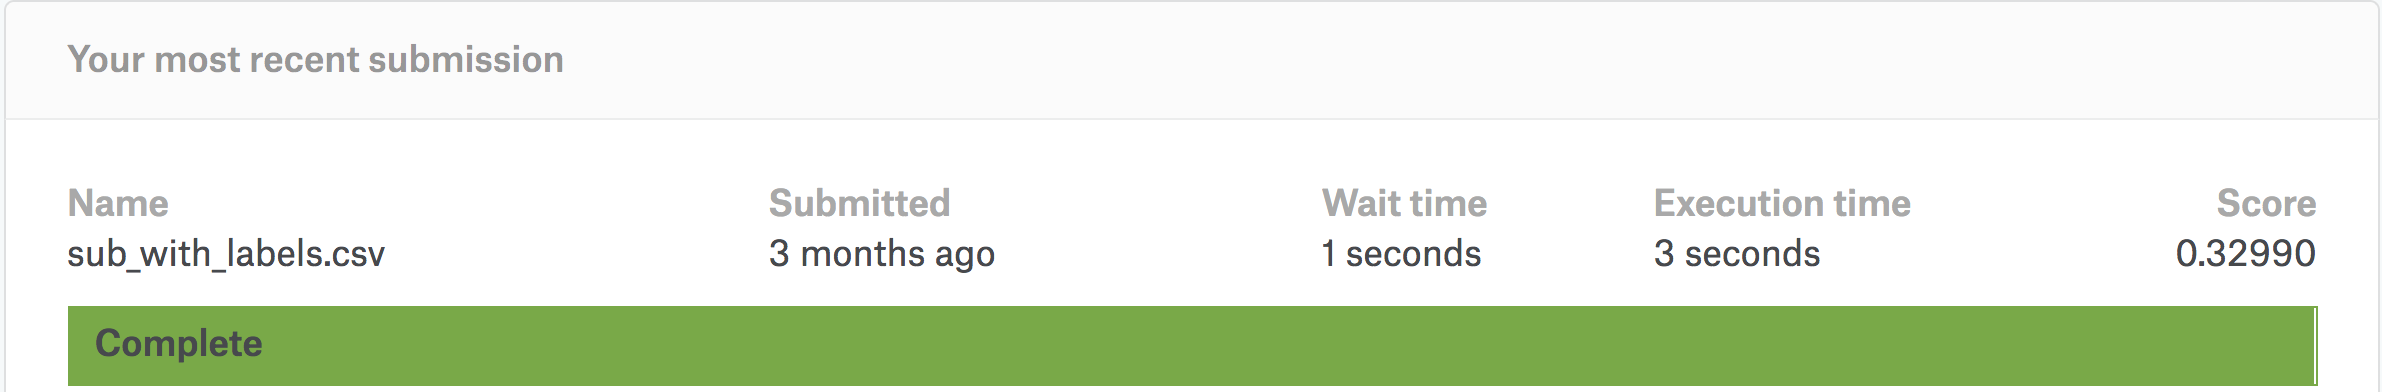

### Load all test data and build a KNN model using best hyperparameter combination

In [35]:
knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='distance', n_jobs=-1)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=1,
           weights='distance')

### Import test images and generate predictions
The full Kaggle test data can be found <a href="https://www.kaggle.com/c/cifar-10/data">**here**</a> in the file called test.7z (you must extract the images from this file using a .7z extractor of your choice).  For the example code below, these images were extracted to a subdirectory called data/test in the current working directory.

In [ ]:
!mkdir data
!mkdir data/test

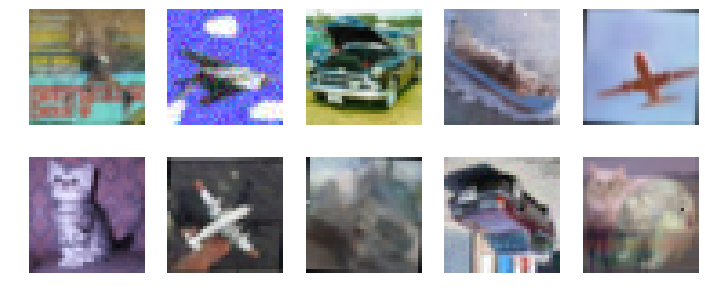

In [40]:
from matplotlib.pyplot import imread

def show_pic(x):
    plt.imshow(x.reshape((3, 32, 32)).transpose(1, 2, 0).astype("uint8"))
    plt.axis("off")
    
    
##  Loading 300,000 images at once requires a lot of resources
##  This code loads and predicts small batches of test data at a time

y_test_preds = []
for batch in range (0, 3000):
    X_test = []
    if batch>0:
        first = (batch*100) + 1
        last = (batch*100) + 100
    else:
        first = 1
        last = 101
    for n in range(first,last):
        file = './data/test/'+str((n))+'.png'
        X_test.append(imread(file).transpose(2,0,1)*255)
    X_test = np.array(X_test).reshape(len(X_test),-1)
    y_test_preds.extend(knn.predict(X_test))

    if batch==0:  # sanity check images for first batch only
        plt.figure(figsize=(12, 5))
        for i in range(10):
            plt.subplot(2, 5, i + 1)
            show_pic(X_test[i])

### Output predictions in format required for Kaggle submission

In [43]:
# create a dictionary with each label corresponding to a class number (0 to n-1)
label_dict = {}
for n,c in enumerate(classes):
    label_dict.update({n:c})
label_preds = list(map(label_dict.get, y_preds))

In [44]:
import pandas as pd

# save to csv (with header row and item number in the first column)
ids = list(range(1,300001))
kaggle_submission = pd.DataFrame(columns=['id','label'])
kaggle_submission['id'] = ids
kaggle_submission['label'] = label_preds
kaggle_submission.to_csv('./submission.csv', index=False)

In [48]:
# display top 10 rows of CSV file for Kaggle submission
print(kaggle_submission.shape)
kaggle_submission.head(10)

(300000, 2)


,id,label
0,1,bird
1,2,airplane
2,3,bird
3,4,ship
4,5,bird
5,6,airplane
6,7,bird
7,8,bird
8,9,frog
9,10,airplane


### Sample screenshot of Kaggle submission results
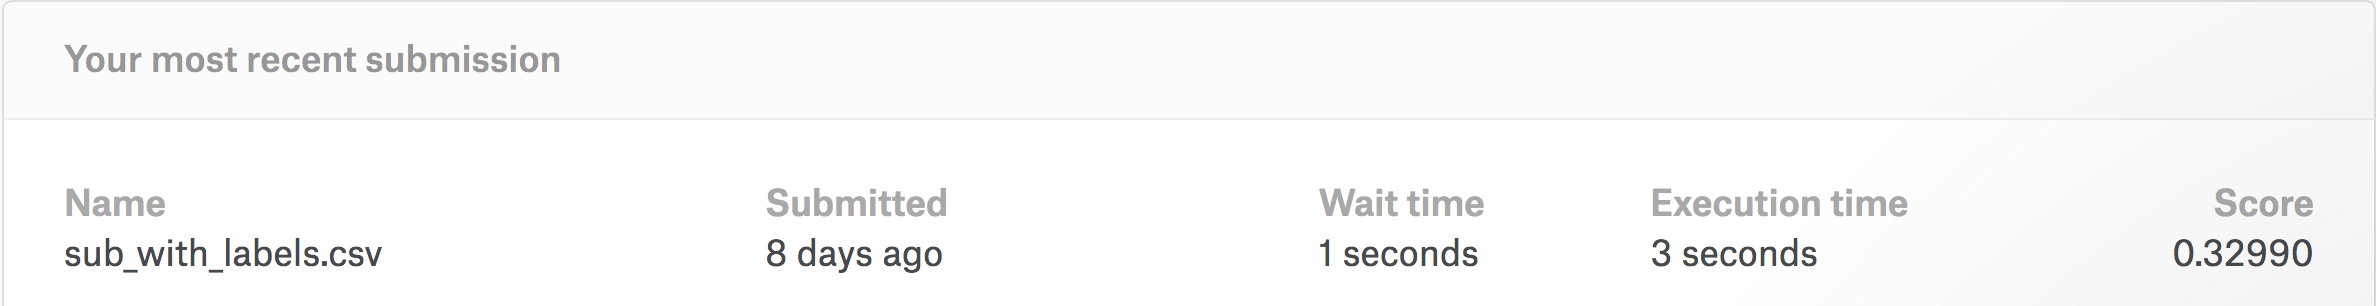

# Assignment: KNN Regression



## Task: KNN regression model for the Boston housing data

Using SKLearn's implemention of KNN, determine a good KNN regression model for the Boston housing data

* put 20% of the data aside as a random test that should not be used during training (and it should be not during hyperparameter tuning). Please use it to report MSE (Mean squared error) on the model you deem best after hyperparameter tuning via GridSearch using a pipeline. 

## Boston housing data
In this notebook we're going to build a basic predictive regression model for estimating the house prices in thousands of $ given some housing factors such as crime rate in neighborhood, number of schools % lower status of the population etc.

Boston dataset is extremely common in machine learning experiments thus it is embedded in sklearn.



### Load and split the data

In [50]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [51]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Detailed description of dataset and features

In [52]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Lets do some EDA
Create pandas dataframe with example houses in rows and features in columns

In [53]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [54]:
X.head() #X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Let's look at the summary statistics

In [55]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Scaling as a separate step (not in a pipeline)

Let's also do normalization to the range of $(0; 1)$ to make our data insensitive to the scale of features

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Note that we're going to learn normalization constants only on training set. That's done because the assumption is that test set is unreachable during training.

In [57]:
X_train = scaler.fit_transform(X_train)

Transform test set with the same constants

In [58]:
X_test = scaler.transform(X_test)

### Conduct grid search to identify and best model using a pipeline

Use a pipeline as part of the grid search. No pipeline means no grade!

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

np.random.seed(42) 

knn_reg = KNeighborsRegressor()
parameters = {'knn__n_neighbors': list(range(1,11)),
              'knn__p': list(range(1,4)),
              'knn__weights': ['uniform', 'distance']}

pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsRegressor())])
                
knn_reg_gs = GridSearchCV(pipe, parameters, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [60]:
%%time

knn_reg_gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  kn

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'knn__p': [1, 2, 3], 'knn__weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

### Generate and score predictions using best model

In [61]:
knn_reg_gs.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='distance'))])

In [62]:
test_preds = knn_reg_gs.best_estimator_.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error
results = pd.DataFrame(columns=["Model", "k", "p", "weights","MSE"])
results.loc[len(results)] = ["KNN Regressor Test", knn_reg_gs.best_params_['knn__n_neighbors'],
                             knn_reg_gs.best_params_['knn__p'], knn_reg_gs.best_params_['knn__weights'],
                             round(mean_squared_error(y_test, test_preds),3)]
results

,Model,k,p,weights,MSE
0,KNN Regressor Test,2,2,distance,15.726


### Discussion 
The MSE for a linear regression model is 17.483062 (see in the coming lectures). So the KNN MSE of 15.7 is competitive!

We will revisit the Boston House price prediction problem in more detail in the coming lectures.


# Optional Assignment: K Nearest Neighbors from scratch

Implement K Nearest Neighbors classifier from scratch with the Class provided and do experiments on the CIFAR-10 dataset  (from Section 4) or the digits dataset in Section 2 above  or both(!):

* Take the best parameters from section 4.1 
* Train a classifier
* Report a quality and discuss any differences with the SKLearn implemenentation



K Nearest Neighbors classier is the simplest **metric** classifier. The idea behind it is to find $k$ most *similar* objects and make a classification decision based on them.

To formalize the notion of similarity one should introduce the measure of the difference. Here we're going to use $L_p$ norm and induced metric.

$$
d_p(\mathbf{x}_1, \mathbf{x}_2) = \|\mathbf{x}_1 - \mathbf{x}_2\|_p = \left( \sum_{j=1}^{m}\left| x_{1, \,j} - x_{2, \,j} \right|^p \right)^{1/p}
$$

There are special names for some of the $L_p$ metrics:
* $p=1$ is Manhattan distance
* $p=2$ is Euclidian distance

For other metrics one can see [here](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

Process of learning for KNN classifier is no more than just remembering all the training examples to find the closest one later on. There are smart ways (such as [KD trees](https://en.wikipedia.org/wiki/K-d_tree)) of storing training objects to be able to find nearest one very fast (faster than simply scanning through all of them). But here you need to implement it as a simple **array**.

For the prediction the following strategy is used:
* Find $k$ closest examples from train set
* Find the most frequent label among these $k$ closest objects (if there are few labels with the same number of objects than pick any label from those)
* Assign this label to new object

## Re-load and downsample CIFAR-10 dataset

In [64]:
# Load training data
for b in range(1, 6):
    data_batch = unpickle("/root/tmp/cifar-10-batches-py/data_batch_" + str(b))
    if b == 1:
        X_train = data_batch["data"]
        y_train = np.array(data_batch["labels"])
    else:
        X_train = np.append(X_train, data_batch["data"], axis=0)
        y_train = np.append(y_train, data_batch["labels"], axis=0)

# Load test data
data_batch = unpickle("/root/tmp/cifar-10-batches-py/test_batch")
X_test = data_batch["data"]
y_test = np.array(data_batch["labels"])

# Load class data
classes = unpickle("/root/tmp/cifar-10-batches-py/batches.meta")["label_names"]

# downsample the training and test data to 10% 
subsample_rate = 0.1
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [65]:
class KNNHomegrown(object):
    
    def __init__(self, n_neighbors=5, p=2):
        self.n_neighbors = n_neighbors
        self.p = p
        self._train_objects = np.array([])
        self._train_labels = np.array([])
        
    def _metric_func(self, x1, x2):
        """
        Return distance between two objects in Lp metric
        
        Args:
            x1(ndarray): first object
            x2(ndarray): second object
        Return:
            distance(float): Lp distance 
                             between x1 and x2
        """
        
        distance = 0.
        
        #==================================================#
        #               Place your code here               #
        #==================================================#
 
        distance = np.linalg.norm(x1 - x2, ord=self.p, axis=1)
    
        return distance
    
    def _accuracy(self, y_true, y_pred):
        """
        Return the accuracy error measure
        
        Args:
            y_true(ndarray): true labels
            y_pred(ndarray): predicted labels
        Return:
            acc(float):      accuracy
        """
        
        acc = 0.
        
        #==================================================#
        #               Place your code here               #
        #==================================================#
            
        acc = np.mean(y_true == y_pred)
        
        return acc
    
    def fit(self, X, y):
        """
        Fits the KNN classification model
        
        Args:
            X(ndarray): objects to train on
            y(ndarray): labels for each object
        Return:
            self
        """
        
        self._train_objects = np.array([])
        self._train_labels = np.array([])
        
        #==================================================#
        #               Place your code here               #
        #==================================================#
        
        self._train_objects = X
        self._train_labels = y
        
        return self
        
    def _nearest_neighbors(self, X):
        """
        Get n nearest neighbors for each object in X.
        For each object in X returns the array of n
        closest objects in train set.
        
        Args:
            X(ndarray): objects
        Return:
            nearest_indices(ndarray): array of nearest 
                                      objects indices
        """
        
        
        nearest_indices = np.zeros(shape=(X.shape[0], 
                                          self.n_neighbors), dtype=np.int) - 1
        nearest_distances = np.zeros(shape=(X.shape[0], 
                                          self.n_neighbors), dtype=np.int) - 1
        
        #==================================================#
        #               Place your code here               #
        #            Hint: use self._metric_func           #
        #==================================================#

        for i in range(X.shape[0]):
            if (i + 1) % 100 == 0:
                print("Object {} out of {} has been predicted".format(i + 1, X.shape[0]))
            distances = self._metric_func(X[i], self._train_objects)
            index_order = np.argsort(distances)[:self.n_neighbors]
            nearest_indices[i] = index_order
            nearest_distances[i] = distances[index_order]
            
        return (nearest_indices, nearest_distances)
    
    
    def predict(self, X):
        """
        Predict the label for new objects
        
        Args:
            X(ndarray): objects to predict
        Return:
            y(ndarray): labels for objects
        """
        
        y = np.zeros(shape=(X.shape[0],))
        
        #==================================================#
        #               Place your code here               #
        #        Hint: use self._nearest_neighbors         #
        #==================================================#
 
        nearest_indices, nearest_distances = self._nearest_neighbors(X)
        nearest_labels = self._train_labels[nearest_indices]

        for i in range(X.shape[0]):
            y[i] = np.argmax(np.bincount((nearest_labels[i])))
        
        return y
    
    def score(self, X, y):
        """
        Return a dictionary which contains accuracy and Lp
        error metrics
        
        Args:
            X(ndarray):    objects to predict
            y(ndarray):    true labels for objects
        Return:
            metrics(dict): dictionary which contains metrics
        """
        
        y_pred = self.predict(X)
        
        acc = self._accuracy(y, y_pred)
        loss = np.linalg.norm(y - y_pred, ord=self.p)
        
        metrics = {"acc": acc, "loss": loss}
        
        return metrics

In [66]:
# set arbitrary values for n_neighbors and p parameters
n_neighbors = 5
p = 1
np.random.seed(42) 

model_knn_homegrown = KNNHomegrown(n_neighbors=n_neighbors, p=p)

In [67]:
start_time = datetime.now()   
model_knn_homegrown.fit(X_train, y_train)
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

In [68]:
# This code calculates the accuracy on the training data,
# but as training data 5x the size of test, it will take 5x as long
# Run it at your leasure, or just set trainAcc=0
youReallyWantToRunThis = False  # it will take  an hour or more to run
if youReallyWantToRunThis:
    start_time = datetime.now()   
    metrics = model_knn_homegrown.score(X_train, y_train)
    end_time = datetime.now()
    wallTimeInSecondsTrainPredict = (end_time - start_time).total_seconds()
    print("Training data prediction time (s): ", wallTimeInSecondsTrainPredict)
    trainAcc = metrics["acc"]
else:
    wallTimeInSecondsTrainPredict = 3600.0 #seconds; not logged in our experiment table currently
    trainAcc=0.4740  #47.4% accuracy on the training data

In [69]:
start_time = datetime.now()   
metrics = model_knn_homegrown.score(X_test, y_test)
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()
testAcc = metrics["acc"]

Object 100 out of 1000 has been predicted
Object 200 out of 1000 has been predicted
Object 300 out of 1000 has been predicted
Object 400 out of 1000 has been predicted
Object 500 out of 1000 has been predicted
Object 600 out of 1000 has been predicted
Object 700 out of 1000 has been predicted
Object 800 out of 1000 has been predicted
Object 900 out of 1000 has been predicted
Object 1000 out of 1000 has been predicted


In [70]:
experimentLog.loc[len(experimentLog)] =["Homegrown knn", "Cifar-10", f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{n_neighbors, p}","Homegrown model trained on 10% of training data"]

experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,6.34 secs,0.10 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model
1,knn,Cifar10,25.70%,23.50%,233.01 secs,0.41 secs,"{'n_neighbors': 4, 'p': 1}",5-foldCV-based gridSearch BEST model
2,knn,Cifar-10,47.40%,36.84%,125.36 secs,768.32 secs,"{'n_neighbors': 4, 'p': 1}",Best model trained on 100% of training data
3,KNN Weighted Test GS,Cifar10,27.20%,26.50%,918.13 secs,0.51 secs,"{'n_neighbors': 5, 'p': 1}",5-foldCV-based gridSearch BEST model
4,Homegrown knn,Cifar-10,47.40%,22.40%,0.00 secs,156.18 secs,"(5, 1)",Homegrown model trained on 10% of training data


# Optional Assignment:  K Weighted Nearest Neighbors

## Vanilla KNN using majority voting
For a classification task using KNN, where K > 1, a majority voting can be thought of as the following: let's assign weight $1$ to each of the $K$ neighbors of the test case  and then just sum up the  weights for each class assign the majority class to the label of the test case. In the case of a draw, we can  randomly select a class based upon unform sampling.

## Weight KNN
Rather than assignment a  equal weight of $1$ to each nearest neighbor, let's assume that weight of each object is **inversly proporional** to the distance to test case. It means that the smaller the distance is the more the weight will be $-$ exactly that we want. The classification is done with the same rule $-$ we just sum up weights for each class and choose the class with the largest weight. 

We can follow a similar strategy for KNN Regression.

## Task: implement a weighted  KNN for classification
Implement a weighted  KNN for classification and report your findings on the CIFAR-10 dataset or the digits dataset in Section 2 above or both!

In [71]:
class KNNWeightedHomegrown(KNNHomegrown):
    
    def __init__(self, n_neighbors=5, p=2, weight_mode="uniform"):
        super(KNNWeightedHomegrown, self).__init__(n_neighbors, p)
        
        if weight_mode != "distance":
            weight_mode = "uniform"
        self.weight_mode = weight_mode
        
        if self.weight_mode == "distance":
            self._weight_func = self._inverse_weights
        else:
            self._weight_func = self._uniform_weights
        
    def _inverse_weights(self, distances):
        """
        Generate neighbors weights which are 
        inversly proportional to the distances from
        object to its neighbor.

        Args:
            distances(ndarray): 2D numpy array
                first axes is objects
                second axes is neighbors of object
                in the cell (i; j) there is distance from
                the i^th object to its j^th nearest neighbor
        Return:
            weights(ndarray):   array of weights
        """ 
        
        weights = np.zeros(shape=distances.shape)
        
        #==================================================#
        #               Place your code here               #
        #            Hint: use self._metric_func           #
        #==================================================#

        weights = 1. / distances
        
        return weights
    
    def _uniform_weights(self, distances):
        """
        Generate neighbors weights which are 
        uniformly distributed.

        Args:
            distances(ndarray): 2D numpy array
                first axes is objects
                second axes is neighbors of object
                in the cell (i; j) there is distance from
                the i^th object to its j^th nearest neighbor
        Return:
            weights(ndarray):   array of weights
        """ 
        
        weights = np.ones(shape=distances.shape)
        
        return weights
        
    def predict(self, X):
        """
        Predict the label for new objects.
        Accounts for neighbors with weights in the
        mode defined in the constructor.
        
        Args:
            X(ndarray): objects to predict
        Return:
            y(ndarray): labels for objects
        """
        
        y = np.zeros(X.shape[0]) - 1
        
        #==================================================#
        #               Place your code here               #
        #        Hint1: use self._nearest_neighbors        #
        #           Hint2: use self._weight_func           #
        #==================================================#

        nearest_indices, nearest_distances = self._nearest_neighbors(X)
        nearest_labels = self._train_labels[nearest_indices]
        
        weights = self._weight_func(nearest_distances)
        
        for i in range(X.shape[0]):     
            counts = np.bincount(nearest_labels[i])
            weighted_sum = counts[nearest_labels[i]] * weights[i]
            y[i] = nearest_labels[i][np.argmax(weighted_sum)]
        
        return y

In [72]:
np.random.seed(42) 

model_knn_weighted_homegrown = KNNWeightedHomegrown(n_neighbors=5, p=1, weight_mode='distance')
start_time = datetime.now()   
model_knn_weighted_homegrown.fit(X_train, y_train)
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

In [73]:
# This code calculates the accuracy on the training data,
# but as training data 5x the size of test, it will take 5x as long
# Run it at your leasure, or just set trainAcc=0

start_time = datetime.now()   
y_pred_train = model_knn_weighted_homegrown.predict(X_train)
end_time = datetime.now()
wallTimeInSecondsTrainPredict = (end_time - start_time).total_seconds()
trainAcc = accuracy_score(y_train, y_pred_train)

Object 100 out of 5000 has been predicted
Object 200 out of 5000 has been predicted
Object 300 out of 5000 has been predicted
Object 400 out of 5000 has been predicted
Object 500 out of 5000 has been predicted
Object 600 out of 5000 has been predicted
Object 700 out of 5000 has been predicted
Object 800 out of 5000 has been predicted
Object 900 out of 5000 has been predicted
Object 1000 out of 5000 has been predicted
Object 1100 out of 5000 has been predicted
Object 1200 out of 5000 has been predicted
Object 1300 out of 5000 has been predicted
Object 1400 out of 5000 has been predicted
Object 1500 out of 5000 has been predicted
Object 1600 out of 5000 has been predicted
Object 1700 out of 5000 has been predicted
Object 1800 out of 5000 has been predicted
Object 1900 out of 5000 has been predicted
Object 2000 out of 5000 has been predicted
Object 2100 out of 5000 has been predicted
Object 2200 out of 5000 has been predicted
Object 2300 out of 5000 has been predicted
Object 2400 out of 5

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


In [74]:
start_time = datetime.now()   
y_pred_test = model_knn_weighted_homegrown.predict(X_test)
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()
testAcc = accuracy_score(y_test, y_pred_test)

Object 100 out of 1000 has been predicted
Object 200 out of 1000 has been predicted
Object 300 out of 1000 has been predicted
Object 400 out of 1000 has been predicted
Object 500 out of 1000 has been predicted
Object 600 out of 1000 has been predicted
Object 700 out of 1000 has been predicted
Object 800 out of 1000 has been predicted
Object 900 out of 1000 has been predicted
Object 1000 out of 1000 has been predicted


In [75]:
experimentLog.loc[len(experimentLog)] =["knn", "Cifar-10", f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{n_neighbors, p}","Homegrown model trained on 10% of training data"]

experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,6.34 secs,0.10 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model
1,knn,Cifar10,25.70%,23.50%,233.01 secs,0.41 secs,"{'n_neighbors': 4, 'p': 1}",5-foldCV-based gridSearch BEST model
2,knn,Cifar-10,47.40%,36.84%,125.36 secs,768.32 secs,"{'n_neighbors': 4, 'p': 1}",Best model trained on 100% of training data
3,KNN Weighted Test GS,Cifar10,27.20%,26.50%,918.13 secs,0.51 secs,"{'n_neighbors': 5, 'p': 1}",5-foldCV-based gridSearch BEST model
4,Homegrown knn,Cifar-10,47.40%,22.40%,0.00 secs,156.18 secs,"(5, 1)",Homegrown model trained on 10% of training data
5,knn,Cifar-10,100.00%,22.70%,0.00 secs,159.46 secs,"(5, 1)",Homegrown model trained on 10% of training data
